In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
filings_metadata = pd.read_csv(r'C:\Users\P70088982\Documents\edgar-crawler\datasets\filings_metadata.csv')
filings_metadata['SIC'] = filings_metadata['SIC'].fillna(0).astype(int)

# Companies over time

In [3]:
filings_metadata['Period of Report'] = pd.to_datetime(filings_metadata['Period of Report'], format='%Y-%m-%d')
filings_metadata['Filing Date'] = pd.to_datetime(filings_metadata['Filing Date'], format='%Y-%m-%d')
filings_metadata['reporting_year'] = filings_metadata['Period of Report'].dt.year


In [265]:
filings_metadata['reporting_month'] = filings_metadata['Period of Report'].dt.month

In [280]:
filings_metadata[filings_metadata.filing_year==2024].groupby('reporting_month').count()[['CIK']].tail(6).CIK.sum()/filings_metadata[filings_metadata.filing_year==2024].groupby('reporting_month').count()[['CIK']].CIK.sum()

0.8892929880709921

In [281]:
filings_metadata[filings_metadata.filing_year==2024].groupby('reporting_month').count()[['CIK']].tail(6)


,CIK
reporting_month,
7,60
8,51
9,243
10,62
11,41
12,5656


In [278]:
filings_metadata['filing_year'] = filings_metadata['Filing Date'].dt.year
filings_metadata[filings_metadata.filing_year==2024].groupby('reporting_month').count()[['CIK']]

,CIK
reporting_month,
1,85
2,114
3,202
4,61
5,48
6,251
7,60
8,51
9,243


In [276]:
filings_metadata[filings_metadata.filing_year==2024]

,CIK,Company,Type,Date,complete_text_file_link,html_index,Filing Date,Period of Report,SIC,htm_file_link,State of Inc,State location,Fiscal Year End,filename,reporting_year,submission_length,reporting_month,filing_year
29108,1000209,MEDALLION FINANCIAL CORP,10-K,2024-03-07,https://www.sec.gov/Archives/edgar/data/100020...,https://www.sec.gov/Archives/edgar/data/100020...,2024-03-07,2023-12-31,6199,https://www.sec.gov/Archives/edgar/data/100020...,DE,NY,1231.0,1000209_10K_2023_0000950170-24-027942.htm,2023,67,12,2024
29109,1000228,HENRY SCHEIN INC,10-K,2024-02-28,https://www.sec.gov/Archives/edgar/data/100022...,https://www.sec.gov/Archives/edgar/data/100022...,2024-02-28,2023-12-30,5047,https://www.sec.gov/Archives/edgar/data/100022...,DE,NY,1230.0,1000228_10K_2023_0001000228-24-000011.htm,2023,60,12,2024
29110,1000623,"Mativ Holdings, Inc.",10-K,2024-02-29,https://www.sec.gov/Archives/edgar/data/100062...,https://www.sec.gov/Archives/edgar/data/100062...,2024-02-29,2023-12-31,2621,https://www.sec.gov/Archives/edgar/data/100062...,DE,GA,1231.0,1000623_10K_2023_0001000623-24-000009.htm,2023,60,12,2024
29111,1000694,NOVAVAX INC,10-K,2024-02-28,https://www.sec.gov/Archives/edgar/data/100069...,https://www.sec.gov/Archives/edgar/data/100069...,2024-02-28,2023-12-31,2836,https://www.sec.gov/Archives/edgar/data/100069...,DE,MD,1231.0,1000694_10K_2023_0001000694-24-000007.htm,2023,59,12,2024
29112,1000697,WATERS CORP /DE/,10-K,2024-02-27,https://www.sec.gov/Archives/edgar/data/100069...,https://www.sec.gov/Archives/edgar/data/100069...,2024-02-27,2023-12-31,3826,https://www.sec.gov/Archives/edgar/data/100069...,DE,MA,1231.0,1000697_10K_2023_0001193125-24-047491.htm,2023,58,12,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35981,928465,AMCON DISTRIBUTING CO,10-K,2024-11-08,https://www.sec.gov/Archives/edgar/data/928465...,https://www.sec.gov/Archives/edgar/data/928465...,2024-11-08,2024-09-30,5141,https://www.sec.gov/Archives/edgar/data/928465...,DE,NE,930.0,928465_10K_2024_0001558370-24-015063.htm,2024,39,9,2024
35982,933974,"Azenta, Inc.",10-K,2024-11-27,https://www.sec.gov/Archives/edgar/data/933974...,https://www.sec.gov/Archives/edgar/data/933974...,2024-11-27,2024-09-30,3559,https://www.sec.gov/Archives/edgar/data/933974...,DE,MA,930.0,933974_10K_2024_0001437749-24-036289.htm,2024,58,9,2024
35983,935419,"RCI HOSPITALITY HOLDINGS, INC.",10-K,2024-12-16,https://www.sec.gov/Archives/edgar/data/935419...,https://www.sec.gov/Archives/edgar/data/935419...,2024-12-16,2024-09-30,5812,https://www.sec.gov/Archives/edgar/data/935419...,TX,TX,930.0,935419_10K_2024_0001628280-24-051384.htm,2024,77,9,2024
35984,936395,CIENA CORP,10-K,2024-12-20,https://www.sec.gov/Archives/edgar/data/936395...,https://www.sec.gov/Archives/edgar/data/936395...,2024-12-20,2024-11-02,3661,https://www.sec.gov/Archives/edgar/data/936395...,MD,MD,1102.0,936395_10K_2024_0000936395-24-000044.htm,2024,48,11,2024


In [4]:
filings_metadata.groupby('reporting_year')['CIK'].agg(['count', 'nunique']).reset_index().tail(7)

,reporting_year,count,nunique
19,2019,5577,5515
20,2020,7023,6949
21,2021,7757,7663
22,2022,7482,7346
23,2023,6937,6834
24,2024,6218,6123
25,2025,91,91


Only include the filings relevant to the years [2020,2024]

In [5]:
filings_metadata = filings_metadata[filings_metadata.reporting_year.isin(range(2020,2025))]

In [6]:
len(filings_metadata)

35417

In [7]:
companies_per_year = filings_metadata.groupby('reporting_year')[['CIK']].nunique()
companies_per_year.columns = ['companies']

# Company sampling

In [253]:
ai_mentions = pd.read_csv(r'C:\Users\P70088982\Documents\edgar-crawler\datasets\ai_mentions.csv')
ai_mentions = ai_mentions[ai_mentions.reporting_year.isin(range(2020,2025))]

In [258]:
(55807+46648)/len(ai_mentions)

0.906232309651854

In [256]:
ai_mentions.groupby('match_field').count()[['cik']]

,cik
match_field,
1A_matches,55807
1_matches,46648
3_matches,89
7_matches,10512


In [9]:
random_50 = ai_mentions.groupby('company')[['cik']].first().sample(50, random_state=42)

In [10]:
random_50.to_excel('../datasets/random_50.xlsx')

# 1 vs 1A items over time

In [11]:
ai_mentions.keyword.unique()

array(['Artificial Intelligence', 'AI', 'generative', 'Generative',
       'machine learning', 'artificial intelligence', 'image recognition',
       'speech recognition', 'natural language processing', 'NLP',
       'computer vision', 'Machine Learning',
       'Natural Language Processing', 'ai', 'AGI', 'chatbot',
       'Artificial intelligence', 'voice assistant',
       'artificial Intelligence', 'deep learning',
       'ARTIFICIAL INTELLIGENCE', 'A.I', 'Machine learning', 'Ai',
       'Computer Vision', 'Deep learning', 'Deep Learning', 'deepfake',
       'Chatbot', 'MACHINE LEARNING', 'recommendation system',
       'Computer vision', 'Speech Recognition', 'Speech recognition',
       'ChatBot', 'GENERATIVE', 'Voice Assistant',
       'NATURAL LANGUAGE PROCESSING', 'Natural language processing',
       'Image recognition', 'A.i', 'CHATBOT',
       'artificial general intelligence', 'machine Learning', 'Deepfake',
       'ChatBOT'], dtype=object)

In [12]:
ai_mentions = pd.read_csv(r'C:\Users\P70088982\Documents\edgar-crawler\datasets\ai_mentions.csv')
ai_mentions = ai_mentions[ai_mentions.reporting_year.isin(range(2020,2025))]

In [36]:
companies_ai_mentioned = ai_mentions.groupby('reporting_year')[['cik']].nunique().rename(columns={'cik': 'companies'})
companies_ai_mentioned_norm = ai_mentions.groupby('reporting_year')[['cik']].nunique().rename(columns={'cik': 'companies'})/ companies_per_year
companies_ai_mentioned_norm.columns = ['companies_per']

In [14]:
ai_mentions.sentence.nunique()

50744

Time taken to file

In [15]:
filings_metadata['submission_length'] = (filings_metadata['Filing Date'] - filings_metadata['Period of Report']).dt.days

In [16]:
filings_metadata.submission_length.describe(percentiles=[0.9, 0.99])

count    35417.000000
mean        75.314934
std         39.478440
min          0.000000
50%         72.000000
90%         92.000000
99%        212.840000
max       1380.000000
Name: submission_length, dtype: float64

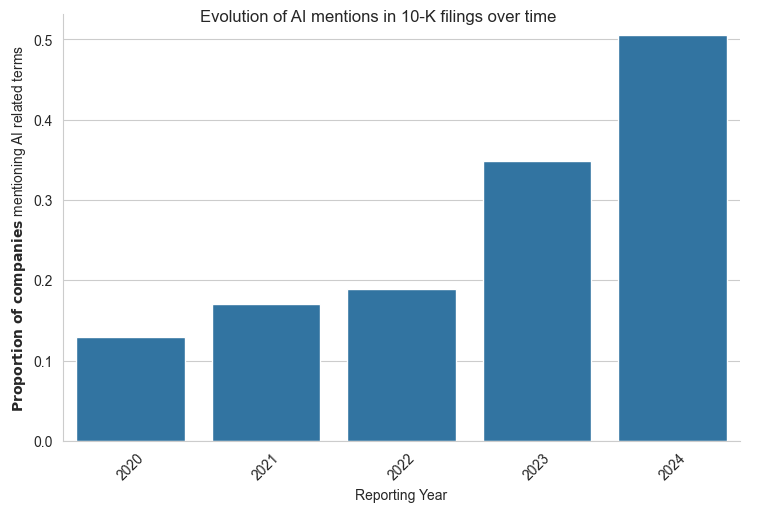

In [17]:
# Seaborn scatter plot of evolution in number of mentions over time (split by match field)
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style(style="whitegrid"):
    # Increase dot size
    g = sns.catplot(data=companies_ai_mentioned_norm.reset_index(), x='reporting_year', y='companies_per', kind='bar', height=5, legend_out=True, aspect=1.5)
    g.fig.suptitle('Evolution of AI mentions in 10-K filings over time')

    g.set_xticklabels(rotation=45)
    g.set_xlabels('Reporting Year')
    g.set_ylabels(r'$\bf{Proportion\ of\ companies}$ mentioning AI related terms')
    plt.savefig('../figures/proportion_ai_mentions.jpg', dpi=300, bbox_inches='tight')
    plt.show()


Mentions per filing

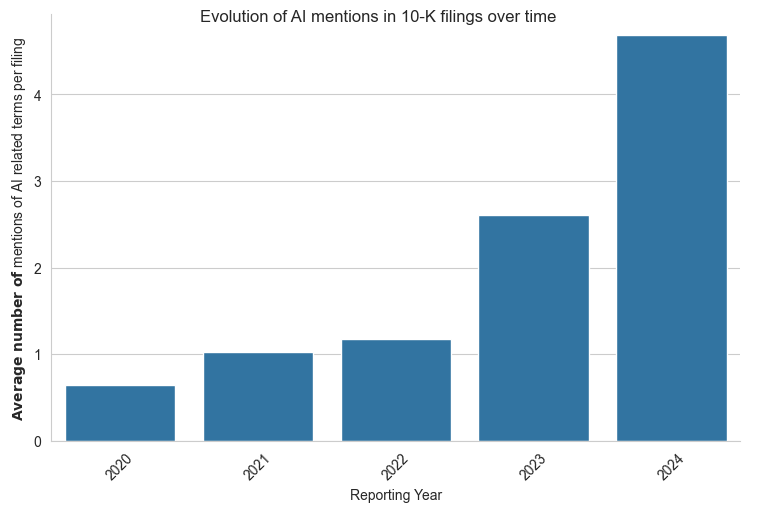

In [46]:

import seaborn as sns
import matplotlib.pyplot as plt
ai_mentions_norm = ai_mentions.groupby('reporting_year')[['sentence']].nunique().rename(columns={'sentence': 'companies'})/ companies_per_year
ai_mentions_norm.columns = ['avg_ai_mentions_per_company']
with sns.axes_style(style="whitegrid"):
    # Increase dot size
    g = sns.catplot(data=ai_mentions_norm.reset_index(), x='reporting_year', y='avg_ai_mentions_per_company', kind='bar', height=5, legend_out=True, aspect=1.5)
    g.fig.suptitle('Evolution of AI mentions in 10-K filings over time')

    g.set_xticklabels(rotation=45)
    g.set_xlabels('Reporting Year')
    g.set_ylabels(r'$\bf{Average\ number\ of}$ mentions of AI related terms per filing')
    plt.savefig('../figures/ai_mentions_per_filing.jpg', dpi=300, bbox_inches='tight')
    plt.show()


Mentions per filing that mentions AI at least once

In [155]:
ai_mentions_norm

,avg_ai_mentions_per_company
reporting_year,
2020,4.960044
2021,5.976336
2022,6.247118
2023,7.484277
2024,9.269206


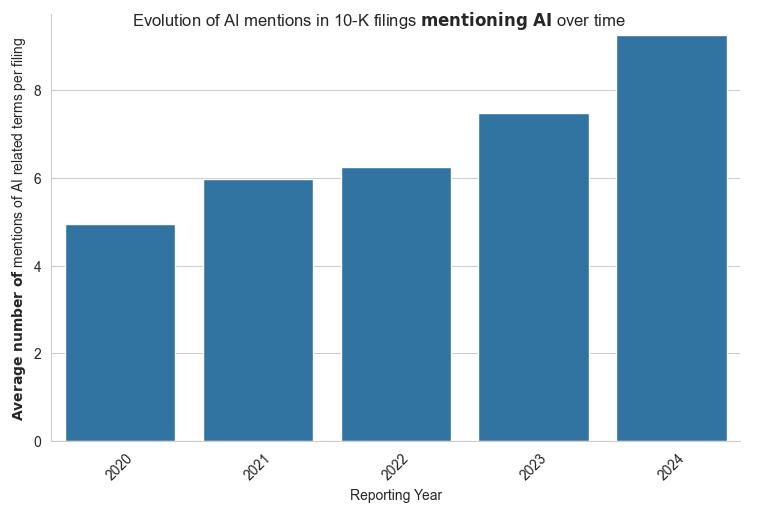

In [244]:
# Seaborn scatter plot of evolution in number of mentions over time (split by match field)
import seaborn as sns
import matplotlib.pyplot as plt
ai_mentions_norm = ai_mentions.groupby('reporting_year')[['sentence']].nunique().rename(columns={'sentence': 'companies'})/ companies_ai_mentioned
ai_mentions_norm.columns = ['avg_ai_mentions_per_company']
with sns.axes_style(style="whitegrid"):
    # Increase dot size
    g = sns.catplot(data=ai_mentions_norm.reset_index(), x='reporting_year', y='avg_ai_mentions_per_company', kind='bar', height=5, legend_out=True, aspect=1.5)
    g.fig.suptitle(r'Evolution of AI mentions in 10-K filings $\bf{mentioning\ AI}$ over time')

    g.set_xticklabels(rotation=45)
    g.set_xlabels('Reporting Year')
    g.set_ylabels(r'$\bf{Average\ number\ of}$ mentions of AI related terms per filing')
    plt.savefig('../figures/ai_mentions_per_ai_filing.jpg', dpi=300, bbox_inches='tight')
    plt.show()


In [252]:
paper_table = companies_ai_mentioned_norm.join(ai_mentions_norm)
paper_table.companies_per = paper_table.companies_per*100
paper_table.columns = ['Percentage of companies that mention AI', 'Average # of unique sentences about AI']
latex_table = paper_table.to_latex(float_format="%.2f")
print(latex_table)

\begin{tabular}{lrr}
\toprule
{} &  Percentage of companies that mention AI &  Average \# of unique sentences about AI \\
reporting\_year &                                          &                                         \\
\midrule
2020           &                                    12.97 &                                    4.96 \\
2021           &                                    17.10 &                                    5.98 \\
2022           &                                    18.89 &                                    6.25 \\
2023           &                                    34.90 &                                    7.48 \\
2024           &                                    50.60 &                                    9.27 \\
\bottomrule
\end{tabular}



C:\Users\P70088982\AppData\Local\Temp\ipykernel_19856\4253081804.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = paper_table.to_latex(float_format="%.2f")


In [26]:
ai_mentions.groupby(['reporting_year', 'match_field', 'cik']).nunique()[['sentence']].reset_index().groupby(['reporting_year', 'match_field']).sum()[['cik']]

cik
reporting_year match_field            
2020           1A_matches    288118510
               1_matches    1007191964
               3_matches       2830134
               7_matches     346721426
2021           1A_matches    476210841
               1_matches    1639599063
               3_matches       3872180
               7_matches     550459245
2022           1A_matches    627372387
               1_matches    1661648415
               3_matches       6473603
               7_matches     599294730
2023           1A_matches   2168965619
               1_matches    1828496416
               3_matches       7870815
               7_matches     771708486
2024           1A_matches   3281383275
               1_matches    1944092702
               3_matches       8178412
               7_matches     934116059

In [27]:
companies_ai_mentioned_norm.reset_index()

,reporting_year,companies_per
0,2020,0.129659
1,2021,0.170951
2,2022,0.188946
3,2023,0.348990
4,2024,0.505961


C:\Users\P70088982\AppData\Local\Temp\ipykernel_21256\1213250543.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  companies_per_item = grouped.set_index('reporting_year').join(companies_per_year, on='reporting_year')


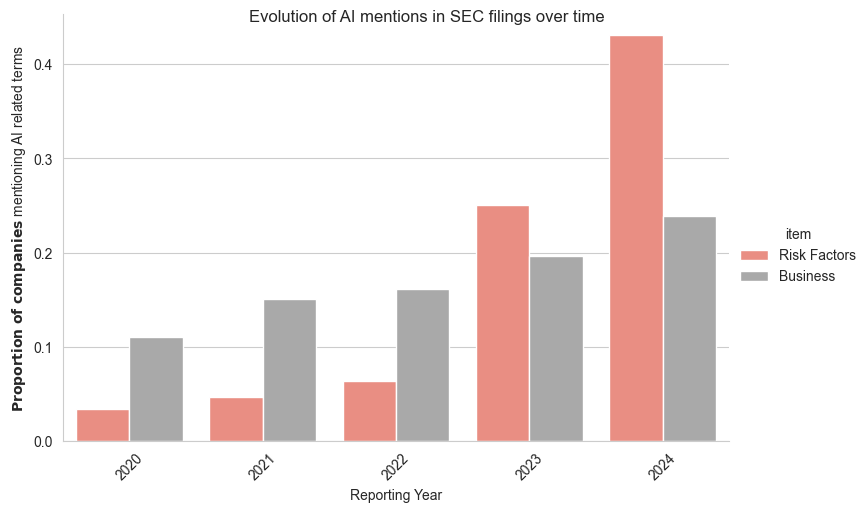

In [60]:
# Seaborn scatter plot of evolution in number of mentions over time (split by match field)
import seaborn as sns
import matplotlib.pyplot as plt
grouped = ai_mentions[ai_mentions.match_field.isin(['1_matches', '1A_matches'])].groupby(['reporting_year', 'match_field']).agg(['nunique'])[['cik']].reset_index()
companies_per_item = grouped.set_index('reporting_year').join(companies_per_year, on='reporting_year')
companies_per_item.columns = ['item', 'companies', 'total_companies']
companies_per_item['companies_proportion'] = companies_per_item['companies'] / companies_per_item['total_companies']

with sns.axes_style(style="whitegrid"):
    # Increase dot size
    g = sns.catplot(data=companies_per_item, x='reporting_year', y='companies_proportion', hue='item', kind='bar', height=5, legend_out=True, aspect=1.5, palette = ["salmon", "darkgrey"])
    # Rename labels
    g.fig.suptitle('Evolution of AI mentions in SEC filings over time')
    g._legend.texts[0].set_text('Risk Factors')
    g._legend.texts[1].set_text('Business')


    g.set_xticklabels(rotation=45)
    g.set_xlabels('Reporting Year')
    g.set_ylabels(r'$\bf{Proportion\ of\ companies}$ mentioning AI related terms')
    plt.savefig('../figures/proportion_ai_mentions_per_item.jpg', dpi=300, bbox_inches='tight')
    plt.show()



C:\Users\P70088982\AppData\Local\Temp\ipykernel_19856\2327869657.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  avg_mention_per_item = grouped.set_index('reporting_year').join(companies_per_year, on='reporting_year')


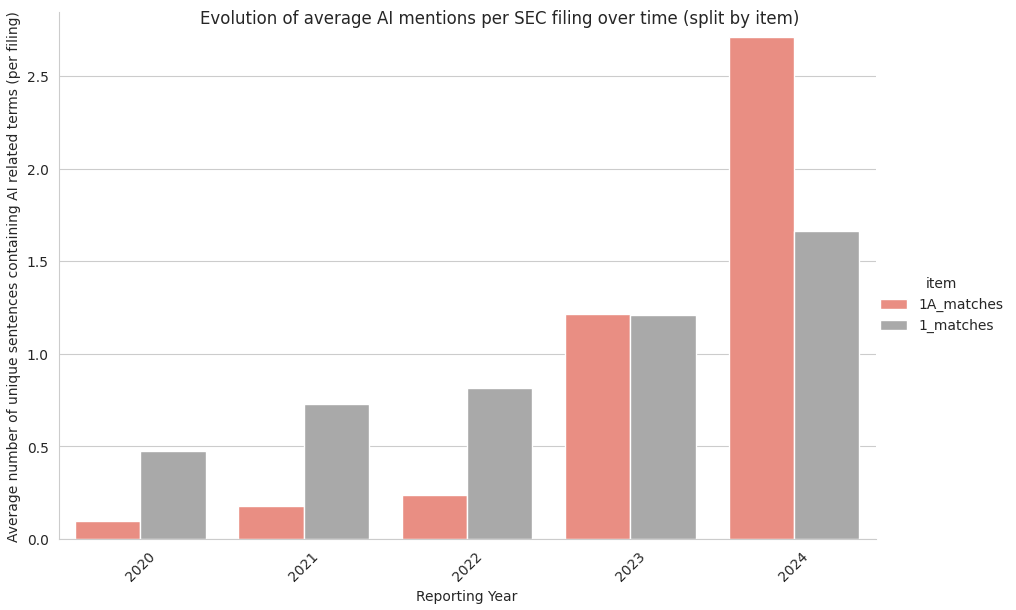

In [284]:
# Seaborn scatter plot of evolution in number of mentions over time (split by match field)
import seaborn as sns
import matplotlib.pyplot as plt
grouped = ai_mentions[ai_mentions.match_field.isin(['1_matches', '1A_matches'])].groupby(['reporting_year', 'match_field']).agg(['nunique'])[['sentence']].reset_index()
avg_mention_per_item = grouped.set_index('reporting_year').join(companies_per_year, on='reporting_year')
avg_mention_per_item.columns = ['item', 'unique_mentions', 'total_companies']
avg_mention_per_item['avg_mentions_per_item'] =avg_mention_per_item['unique_mentions'] / avg_mention_per_item['total_companies']

with sns.axes_style(style="whitegrid"):
    # Increase dot size
    g = sns.catplot(data=avg_mention_per_item, x='reporting_year', y='avg_mentions_per_item', hue='item', kind='bar', height=6, legend_out=True, aspect=1.5, palette = ["salmon", "darkgrey"])
    g.fig.suptitle('Evolution of average AI mentions per SEC filing over time (split by item)')

    g.set_xticklabels(rotation=45)
    g.set_xlabels('Reporting Year')
    g.set_ylabels('Average number of unique sentences containing AI related terms (per filing)')
    plt.savefig('../figures/avg_ai_mentions_per_item_per_filing.jpg', dpi=300, bbox_inches='tight')



In [285]:
avg_mention_per_item

,item,unique_mentions,total_companies,avg_mentions_per_item
reporting_year,,,,
2020,1A_matches,661,6949,0.095122
2020,1_matches,3310,6949,0.476328
2021,1A_matches,1351,7663,0.176302
2021,1_matches,5605,7663,0.731437
2022,1A_matches,1728,7346,0.235230
2022,1_matches,5992,7346,0.815682
2023,1A_matches,8297,6834,1.214077
2023,1_matches,8272,6834,1.210418
2024,1A_matches,16588,6123,2.709130


C:\Users\P70088982\AppData\Local\Temp\ipykernel_19856\3307675079.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  avg_mention_per_item = grouped.set_index('reporting_year').join(companies_ai_mentioned, on='reporting_year')


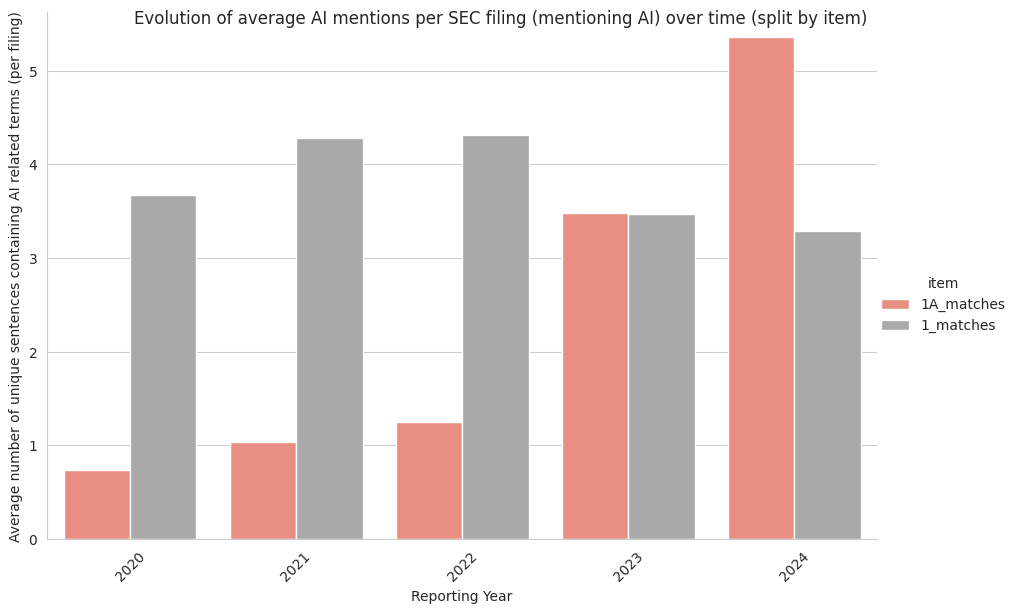

In [286]:
# Seaborn scatter plot of evolution in number of mentions over time (split by match field)
import seaborn as sns
import matplotlib.pyplot as plt
grouped = ai_mentions[ai_mentions.match_field.isin(['1_matches', '1A_matches'])].groupby(['reporting_year', 'match_field']).agg(['nunique'])[['sentence']].reset_index()
avg_mention_per_item = grouped.set_index('reporting_year').join(companies_ai_mentioned, on='reporting_year')
avg_mention_per_item.columns = ['item', 'unique_mentions', 'total_companies']
avg_mention_per_item['avg_mentions_per_item'] =avg_mention_per_item['unique_mentions'] / avg_mention_per_item['total_companies']

with sns.axes_style(style="whitegrid"):
    # Increase dot size
    g = sns.catplot(data=avg_mention_per_item, x='reporting_year', y='avg_mentions_per_item', hue='item', kind='bar', height=6, legend_out=True, aspect=1.5, palette = ["salmon", "darkgrey"])
    g.fig.suptitle('Evolution of average AI mentions per SEC filing (mentioning AI) over time (split by item)')

    g.set_xticklabels(rotation=45)
    g.set_xlabels('Reporting Year')
    g.set_ylabels('Average number of unique sentences containing AI related terms (per filing)')
    plt.savefig('../figures/avg_ai_mentions_per_item_per_ai_filing.jpg', dpi=300, bbox_inches='tight')



In [287]:
avg_mention_per_item

,item,unique_mentions,total_companies,avg_mentions_per_item
reporting_year,,,,
2020,1A_matches,661,901,0.733629
2020,1_matches,3310,901,3.673696
2021,1A_matches,1351,1310,1.031298
2021,1_matches,5605,1310,4.278626
2022,1A_matches,1728,1388,1.244957
2022,1_matches,5992,1388,4.317003
2023,1A_matches,8297,2385,3.478826
2023,1_matches,8272,2385,3.468344
2024,1A_matches,16588,3098,5.354422


# Item 1 and 1A company overlap

In [48]:
# Pivot on the match_field
mention_types = ai_mentions.groupby(['reporting_year', 'match_field', 'cik']).nunique()[['sentence']].reset_index().pivot(index=['reporting_year', 'cik'], columns='match_field', values='sentence').fillna(0).reset_index()

In [59]:
only_risk = mention_types[(mention_types['1A_matches'] > 0) & (mention_types['1_matches'] == 0) & (mention_types.reporting_year == 2024)].shape[0]

In [60]:
only_business = mention_types[(mention_types['1A_matches'] == 0) & (mention_types['1_matches'] > 0) & (mention_types.reporting_year == 2024)].shape[0]

In [61]:
both = mention_types[(mention_types['1A_matches'] > 0) & (mention_types['1_matches'] > 0) & (mention_types.reporting_year == 2024)].shape[0]

In [62]:
neither = mention_types[(mention_types['1A_matches'] == 0) & (mention_types['1_matches'] == 0) & (mention_types.reporting_year == 2024)].shape[0]

In [154]:
business_mentioned = mention_types[(mention_types['1_matches'] > 0) & (mention_types.reporting_year == 2024)].shape[0]
business_mentioned/ companies_per_year.loc[2024, 'companies']

0.23844520659807283

In [95]:
print(f"Out of {companies_per_year.loc[2024].companies} companies that filed a 10-K form in 2024, {companies_ai_mentioned.loc[2024].companies} mentioned AI, which represents {companies_ai_mentioned_norm.loc[2024].companies_per*100:.2f}%:")
print(f"{only_risk} companies only mentioned AI in the Risk Factors section, which represents {only_risk/companies_per_year.loc[2024].companies*100:.2f}% of the total.")
print(f"{only_business} companies only mentioned AI in the Business section, which represents {only_business/companies_per_year.loc[2024].companies*100:.2f}% of the total.")
print(f"{both} companies mentioned AI in both sections, which represents {both/companies_per_year.loc[2024].companies*100:.2f}% of the total.")

Out of 6123 companies that filed a 10-K form in 2024, 3098 mentioned AI, which represents 50.60%:
1582 companies only mentioned AI in the Risk Factors section, which represents 25.84% of the total.
400 companies only mentioned AI in the Business section, which represents 6.53% of the total.
1060 companies mentioned AI in both sections, which represents 17.31% of the total.


In [282]:
 mention_types[(mention_types['1A_matches'] > 0)  & (mention_types.reporting_year == 2024)].shape[0]/companies_per_year.loc[2024].companies*100

43.14878327617181

In [92]:
companies_ai_mentioned_norm.loc[2024].companies_per * 100

50.59611301649518

In [293]:
grouped['sentence', 'nunique'].values

array([  661,  3310,  1351,  5605,  1728,  5992,  8297,  8272, 16588,
       10189], dtype=int64)

In [294]:
grouped = ai_mentions[ai_mentions.match_field.isin(['1_matches', '1A_matches'])].groupby(['reporting_year', 'match_field']).agg(['nunique'])[['sentence']].reset_index().set_index(['reporting_year', 'match_field'])
print(f"At the same time, the total number of AI risk-related mentions has grown by more than {grouped.loc[2024, '1A_matches']['sentence', 'nunique']/grouped.loc[2022, '1A_matches']['sentence', 'nunique']*100} from 2022 to 2024. We see an average of x unique AI-risk sentences per company. ")

At the same time, the total number of AI risk-related mentions has grown by more than 959.9537037037036 from 2022 to 2024. We see an average of x unique AI-risk sentences per company. 


# Industry level

In [299]:
sic_codes = pd.read_csv(r'C:\Users\P70088982\Documents\edgar-crawler\datasets\sic_codes.csv').set_index('SIC Code')

In [300]:
ai_mentions.sentence.nunique()

50744

In [301]:
ai_mentions.cik = ai_mentions.cik.astype(int)

In [302]:
df = ai_mentions.set_index('cik').join(filings_metadata.sort_values('reporting_year', ascending=False).groupby(['CIK'])['SIC'].first(), how='left').reset_index().rename(columns={'index': 'cik'})
df = df.set_index('SIC').join(sic_codes, how='left').reset_index().rename(columns={'index': 'sic'})

In [303]:
grouped = df[df.match_field.isin(['1_matches', '1A_matches'])].groupby(['reporting_year', 'match_field', 'sic', 'Industry Title']).agg(['count', 'nunique'])[['cik']].reset_index()

In [305]:
df[df.company.isin(['MICROSOFT CORP'])]

,sic,cik,company,filing_date,period_of_report,filename,keyword,sentence,match_id,match_field,filing_year,reporting_year,Office,Industry Title
69797,7372,789019,MICROSOFT CORP,2020-07-30,2020-06-30,789019_10K_2020_0001564590-20-034944.htm,Artificial intelligence,Artificial intelligence (“AI”) capabilities ar...,789019_1_Artificial intelligence_3172_3281,1_matches,2020,2020,Office of Technology,SERVICES-PREPACKAGED SOFTWARE
69798,7372,789019,MICROSOFT CORP,2020-07-30,2020-06-30,789019_10K_2020_0001564590-20-034944.htm,AI,Artificial intelligence (“AI”) capabilities ar...,789019_1_AI_3172_3281,1_matches,2020,2020,Office of Technology,SERVICES-PREPACKAGED SOFTWARE
69799,7372,789019,MICROSOFT CORP,2020-07-30,2020-06-30,789019_10K_2020_0001564590-20-034944.htm,AI,"Microsoft 365 brings together Office 365, Wind...",789019_1_AI_5272_5555,1_matches,2020,2020,Office of Technology,SERVICES-PREPACKAGED SOFTWARE
69800,7372,789019,MICROSOFT CORP,2020-07-30,2020-06-30,789019_10K_2020_0001564590-20-034944.htm,AI,Azure is a trusted cloud with comprehensive co...,789019_1_AI_7162_7257,1_matches,2020,2020,Office of Technology,SERVICES-PREPACKAGED SOFTWARE
69801,7372,789019,MICROSOFT CORP,2020-07-30,2020-06-30,789019_10K_2020_0001564590-20-034944.htm,AI,"Being a global-scale cloud, Azure uniquely off...",789019_1_AI_7787_7934,1_matches,2020,2020,Office of Technology,SERVICES-PREPACKAGED SOFTWARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70154,7372,789019,MICROSOFT CORP,2024-07-30,2024-06-30,789019_10K_2024_0000950170-24-087843.htm,AI,The investments we are making in cloud and AI ...,789019_7_AI_4812_4970,7_matches,2024,2024,Office of Technology,SERVICES-PREPACKAGED SOFTWARE
70155,7372,789019,MICROSOFT CORP,2024-07-30,2024-06-30,789019_10K_2024_0000950170-24-087843.htm,AI,We continue to identify and evaluate opportuni...,789019_7_AI_4971_5189,7_matches,2024,2024,Office of Technology,SERVICES-PREPACKAGED SOFTWARE
70156,7372,789019,MICROSOFT CORP,2024-07-30,2024-06-30,789019_10K_2024_0000950170-24-087843.htm,AI,Excluding the impact of the change in accounti...,789019_7_AI_14912_15176,7_matches,2024,2024,Office of Technology,SERVICES-PREPACKAGED SOFTWARE
70157,7372,789019,MICROSOFT CORP,2024-07-30,2024-06-30,789019_10K_2024_0000950170-24-087843.htm,AI,Excluding the impact of the change in accounti...,789019_7_AI_17880_18111,7_matches,2024,2024,Office of Technology,SERVICES-PREPACKAGED SOFTWARE


In [147]:
top_5 = grouped[grouped.sic.isin(grouped[grouped.reporting_year==2024].sort_values(by=[('cik', 'nunique')], ascending=False).head(5).sic)]

In [ ]:
top_15_sic = filings_metadata[filings_metadata.reporting_year == 2024].SIC.value_counts().head(15).index.tolist()

In [168]:
top_15_sic = filings_metadata[filings_metadata.reporting_year == 2024].SIC.value_counts().head(15).index.tolist()

In [193]:
companies_per_sic_per_year = filings_metadata.groupby(['reporting_year', 'SIC']).nunique()[['CIK']].rename(columns={'CIK': 'total_companies'})

In [200]:
# Make sure it's 20 SIC codes
overall_2024 = grouped[(grouped.sic.isin(top_15_sic)) & (grouped.reporting_year==2024)].sort_values(['match_field', ('cik', 'nunique')], ascending=[True, False])
overall_2024.columns = ['reporting_year', 'match_field', 'sic', 'Industry Title', 'mentions', 'unique_companies']
overall_2024 = overall_2024.drop(columns='mentions')
overall_2024 = overall_2024.set_index('sic').join(companies_per_sic_per_year.loc[2024][['total_companies']])
overall_2024['companies_proportion'] = overall_2024.unique_companies/overall_2024.total_companies
overall_2024 = overall_2024.sort_values(['match_field', 'unique_companies'], ascending=[True, False])

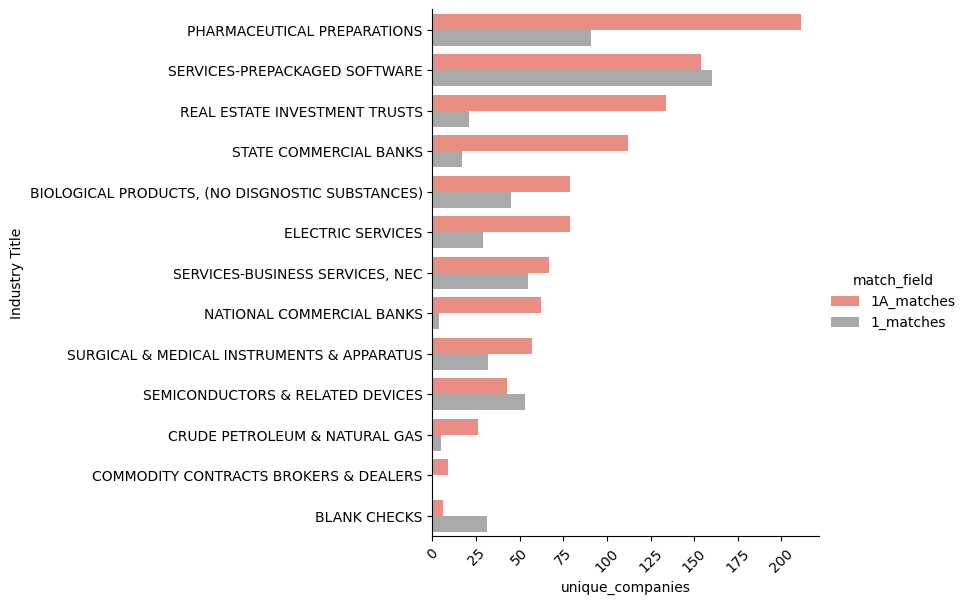

In [241]:
# Turn it into a proportion of filings frm the given SIC code that were filed in 2024 (basically normalizing as we did in the other plots)
# Add a risks plot over time per SIC code of the top 20 SIC codes
sns.catplot(data=overall_2024.sort_values(['match_field', 'unique_companies'], ascending=[True, False]), hue='match_field', x='unique_companies', y='Industry Title', kind='bar', palette = ["salmon", "darkgrey"], height=6, aspect=1.5)
# Rotate the y-axis labels
plt.xticks(rotation=45)
plt.savefig('../figures/2024_business_risk_per_sector.jpg', dpi=300, bbox_inches='tight')


In [ ]:
# Maybe a plot with the distrbution of companies per SIC in 2024?

In [240]:
overall_2024.sort_values(['match_field', 'companies_proportion'])

,reporting_year,match_field,Industry Title,unique_companies,total_companies,companies_proportion
6770,2024,1A_matches,BLANK CHECKS,6,132,0.045455
6221,2024,1A_matches,COMMODITY CONTRACTS BROKERS & DEALERS,9,91,0.098901
1311,2024,1A_matches,CRUDE PETROLEUM & NATURAL GAS,26,91,0.285714
2834,2024,1A_matches,PHARMACEUTICAL PREPARATIONS,211,484,0.435950
3841,2024,1A_matches,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,57,126,0.452381
6798,2024,1A_matches,REAL ESTATE INVESTMENT TRUSTS,134,281,0.476868
2836,2024,1A_matches,"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",79,160,0.493750
3674,2024,1A_matches,SEMICONDUCTORS & RELATED DEVICES,43,80,0.537500
6022,2024,1A_matches,STATE COMMERCIAL BANKS,112,180,0.622222
4911,2024,1A_matches,ELECTRIC SERVICES,79,122,0.647541


(0.0, 1.0)

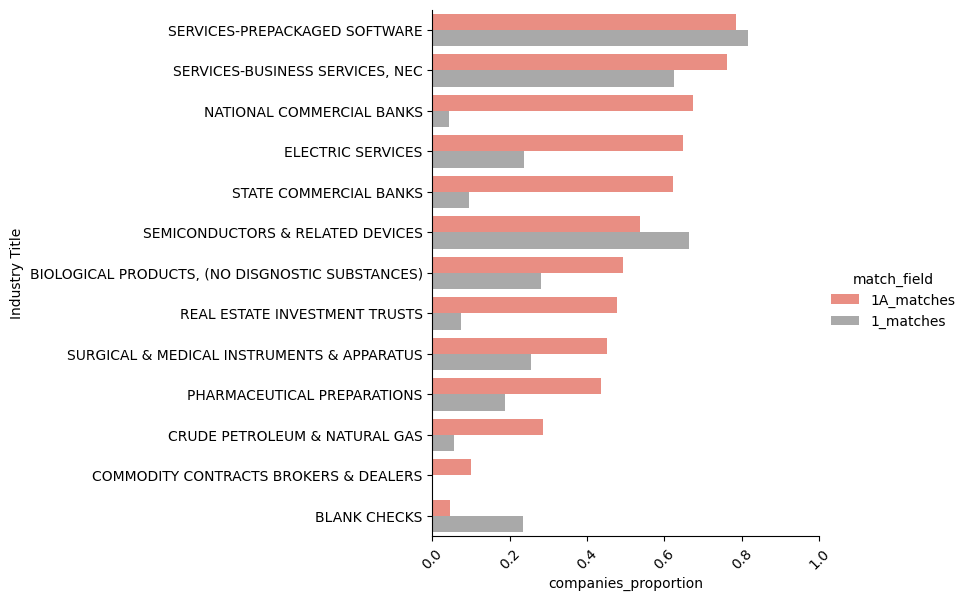

In [227]:
# Turn it into a proportion of filings frm the given SIC code that were filed in 2024 (basically normalizing as we did in the other plots)
# Add a risks plot over time per SIC code of the top 20 SIC codes
sns.catplot(data=overall_2024.sort_values(['match_field', 'companies_proportion'], ascending=[True, False]), hue='match_field', x='companies_proportion', y='Industry Title', kind='bar', palette = ["salmon", "darkgrey"], height=6, aspect=1.5)
# Rotate the y-axis labels
plt.xticks(rotation=45)
plt.xlim(0,1)


In [233]:
top_15_sic

[6189,
 2834,
 6798,
 7372,
 6022,
 0,
 2836,
 6770,
 4911,
 3841,
 6221,
 6021,
 1311,
 7389,
 3674]

In [234]:
# Make sure it's 20 SIC codes
risk_trends = grouped[(grouped.sic.isin(top_15_sic[:10])) & (grouped.match_field=='1A_matches')].sort_values(('cik', 'nunique'), ascending=False)
risk_trends.columns = ['reporting_year', 'match_field', 'SIC', 'Industry Title', 'mentions', 'unique_companies']
risk_trends = risk_trends.drop(columns=['match_field', 'mentions'])
risk_trends = risk_trends.set_index(['reporting_year', 'SIC']).join(companies_per_sic_per_year[['total_companies']])

risk_trends['companies_proportion'] = risk_trends.unique_companies/risk_trends.total_companies
risk_trends = risk_trends.sort_values(['reporting_year', 'companies_proportion'], ascending=[True, True])

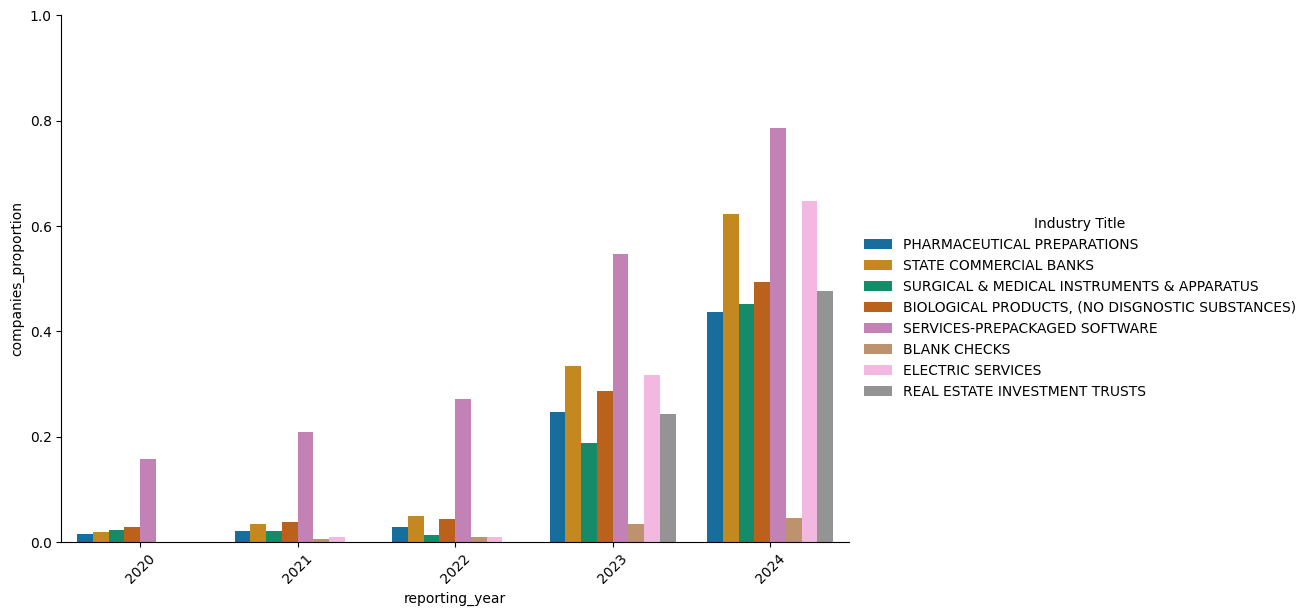

In [242]:
# Turn it into a proportion of filings frm the given SIC code that were filed in 2024 (basically normalizing as we did in the other plots)
# Add a risks plot over time per SIC code of the top 20 SIC codes
sns.catplot(data=risk_trends, hue='Industry Title', y='companies_proportion', x='reporting_year', kind='bar', height=6, aspect=1.5, palette="colorblind")
# Rotate the y-axis labels
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.savefig('../figures/risk_sectoral_over_time.jpg', dpi=300, bbox_inches='tight')